# Below are the tutorials which i followed

1.   https://youtu.be/WQeoO7MI0Bs --> opencv in 3 Hours
2.   https://youtu.be/SgzPF0_dLMY  --> Applied ai course



In [ ]:
!pip install opencv-python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np

# Function for getting the required contour in sorted form

In [ ]:
def getContours(img,cannyThreshold=[100,100],showCanny=False,minArea=1000,filter=0,draw =False):
    #For converting the imge into gray scale
    #Reference : https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/
    imageGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #Refer-- https://pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny/    see-Step #1
    #Box Filter over Gaussian Filter -- https://stackoverflow.com/a/31132999
    # https://docs.opencv.org/3.4/d4/d13/tutorial_py_filteri
    imageBlur = cv2.GaussianBlur(imageGray,(5,5),1)
    #Refer -- https: // docs.opencv.org / 3.4 / da / d5c / tutorial_canny_detector.html
    # Refer (Hysteresis Thresholding) -- https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
    imageCanny = cv2.Canny(imageBlur,cannyThreshold[0],cannyThreshold[1])
    kernel = np.ones((5,5))
    #Refer --https://youtu.be/03B64y9jrF0
    imageDialated = cv2.dilate(imageCanny,kernel,iterations=3)
    imgThre = cv2.erode(imageDialated,kernel,iterations=2)
    if showCanny:cv2.imshow('Canny',imgThre)
    # Refer -- https: // docs.opencv.org / 3.4 / d9 / d8b / tutorial_py_contours_hierarchy.html
    # Refer -- https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
    contours,hiearchy = cv2.findContours(imgThre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    finalCountours = []
    for i in contours:
        area = cv2.contourArea(i)
        if area > minArea:
            # Read -- This is for finding the perimeter
            perimeter = cv2.arcLength(i,True)
            # Read -- https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c
            approx = cv2.approxPolyDP(i,0.02*perimeter,True)
            # It basically bounds the whole contour with rectangle
            bbox = cv2.boundingRect(approx)
            # if the user explicitly defines the number of points, for example 4 for rectangle
            if filter > 0:
                if len(approx) == filter:
                    finalCountours.append([len(approx),area,approx,bbox,i])
            else:
                finalCountours.append([len(approx),area,approx,bbox,i])
    # Sorting based upon the area
    finalCountours = sorted(finalCountours,key = lambda x:x[1] ,reverse= True)
    if draw:
        for con in finalCountours:
            cv2.drawContours(img,con[4],-1,(0,0,255),3)
    return img, finalCountours

# Function for rearranging the co-ordinated of the images

In [ ]:
def rearrange(myPoints):
    #print(myPoints.shape)
    sortedPoints = np.zeros_like(myPoints)
    myPoints = myPoints.reshape((4,2))
    add =np.sum(myPoints,axis=1)
    sortedPoints[0] = myPoints[np.argmin(add)]
    sortedPoints[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints,axis=1)
    sortedPoints[1]= myPoints[np.argmin(diff)]
    sortedPoints[2] = myPoints[np.argmax(diff)]
    return sortedPoints

# Function for wrapping the image

In [ ]:
# Refer -- https://youtu.be/Tm_7fGolVGE
def warpImg (img,points,w,h,padding=20):
    # print(points)
    points =rearrange(points)
    pts1 = np.float32(points)
    pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    imgWarp = cv2.warpPerspective(img,matrix,(w,h))
    imgWarp = imgWarp[padding:imgWarp.shape[0]-padding,padding:imgWarp.shape[1]-padding]
    return imgWarp

# Function to find euclidean distance between two points

In [ ]:
# This function is used to find euclidean distance between two points
def findEucldDistance(pts1,pts2):
    return ((pts2[0]-pts1[0])**2 + (pts2[1]-pts1[1])**2)**0.5

# Below code will prompt you to upload your file and will run the code

Points to be Taken care while taking picture

*   It should have a Dark Green BackGround
*   The picture of the object shuld be taken as length as vertical direction




Saving 7.jpg to 7 (4).jpg


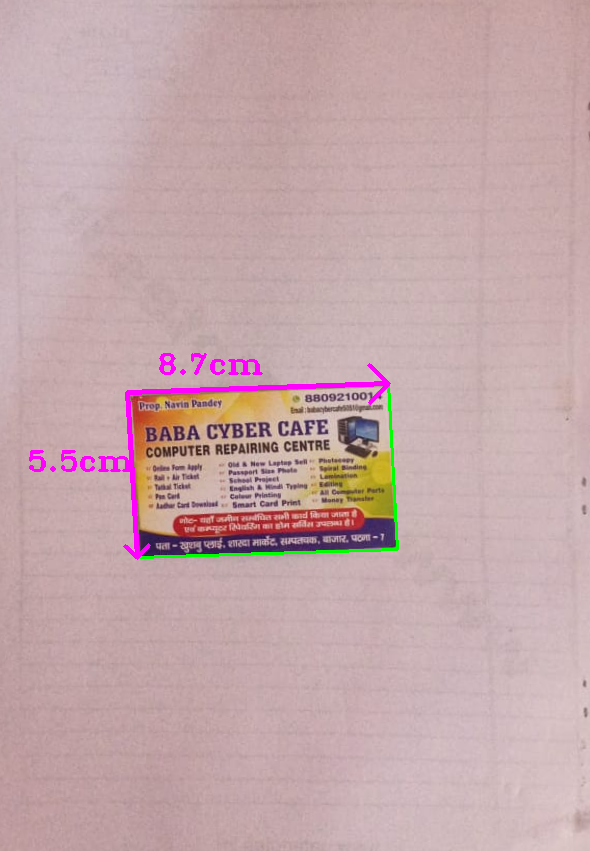

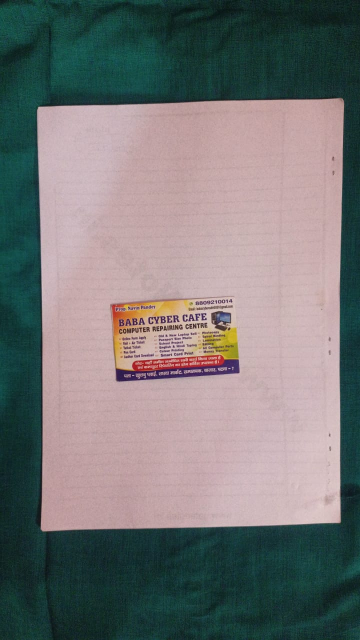

In [ ]:
picture=files.upload()
path = list(picture)[0]
scale = 3
wP = 210 *scale
hP= 297 *scale
i=0
while i<1:
    i+=1
    img = cv2.imread(path)
    imgContours , conts = getContours(img,minArea=50000,filter=4)
    if len(conts) != 0:
        # Since before returning we are sorting the contours the largest one will be in the 0th index.
        largest = conts[0][2]
        imgWarp = warpImg(img, largest, wP,hP)
        imgContours2, conts2 = getContours(imgWarp,minArea=2000, filter=4, cannyThreshold=[50,50],draw = False)
        if len(conts) != 0:
            for obj in conts2:
              #Refer -https://www.youtube.com/watch?v=tViDT_gEpDk
                cv2.polylines(imgContours2,[obj[2]],True,(0,255,0),2)
                nPoints = rearrange(obj[2])
                nW = round((findEucldDistance(nPoints[0][0]//scale,nPoints[1][0]//scale)/10),1)
                nH = round((findEucldDistance(nPoints[0][0]//scale,nPoints[2][0]//scale)/10),1)
                #(image, start_point, end_point,color, thickness)
                # https://www.geeksforgeeks.org/python-opencv-cv2-arrowedline-method/#:~:text=arrowedLine()%20method,-Last%20Updated%20%3A%2023&text=OpenCV%2DPython%20is%20a%20library,point%20to%20the%20end%20point.
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[1][0][0], nPoints[1][0][1]),
                                (255, 0, 255),3)
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[2][0][0], nPoints[2][0][1]),
                                (255, 0, 255), 3)
                x, y, w, h = obj[3]
                # Refer - https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
                cv2.putText(imgContours2, '{}cm'.format(nW), (x + 30, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
                cv2.putText(imgContours2, '{}cm'.format(nH), (x - 100, y + h // 2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
        cv2_imshow( imgContours2)
    img = cv2.resize(img,(0,0),None,0.5,0.5)
    #Used colab specific imsho function
    cv2_imshow(img)
    cv2.waitKey(1)